# NOTEBOOK 3B - Plot Seasonal Forecasts.
### This script plots and compares the data-driven forecast with the ERA5 record.

In [1]:
# Import modules
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import scipy.stats as sp
import pandas as pd
import xarray as xr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.patches as mpatches
import ipywidgets as widgets

## STEP 1 - Open Data
### Determine the period over which to perform the validation

In [3]:
filename = f"Output/DDHWSF_Forecasts_LR_19792021.csv"
df_DDHWSF = pd.read_csv(filename)
preds_DDHWSF=df_DDHWSF.NDQ90_predictions
print (preds_DDHWSF)

filename = "Output/NumberHWdays_ERA5_Cluj-Napoca_thresh90_dur3.csv"
df_DDHWSF = pd.read_csv(filename)
target_ERA5=df_DDHWSF.NumberHWDays
print (target_ERA5)


0      9.878294
1      2.047544
2      2.310065
3      7.357237
4      8.209078
5      7.821633
6      7.705328
7     13.305796
8     11.698590
9     13.636115
10    19.184413
11    10.150720
12     7.466334
13     8.550294
14    12.067460
15    10.796574
16    11.294251
17     9.153732
18     6.125667
19    16.661656
20    17.075418
21     9.447605
22    13.223466
23    11.451577
24    13.860902
25    17.897552
26    10.401851
27    12.221577
Name: NDQ90_predictions, dtype: float64
0      0.0
1     17.0
2      7.0
3      6.0
4      8.0
5     13.0
6      4.0
7     13.0
8      4.0
9      7.0
10     3.0
11     0.0
12     8.0
13     4.0
14    15.0
15     3.0
16     3.0
17    12.0
18    12.0
19    24.0
20     8.0
21    11.0
22    17.0
23     9.0
24     9.0
25     8.0
26    14.0
27     3.0
Name: NumberHWDays, dtype: float64


## STEP 1 - Plot Forecasts and Skill Scores

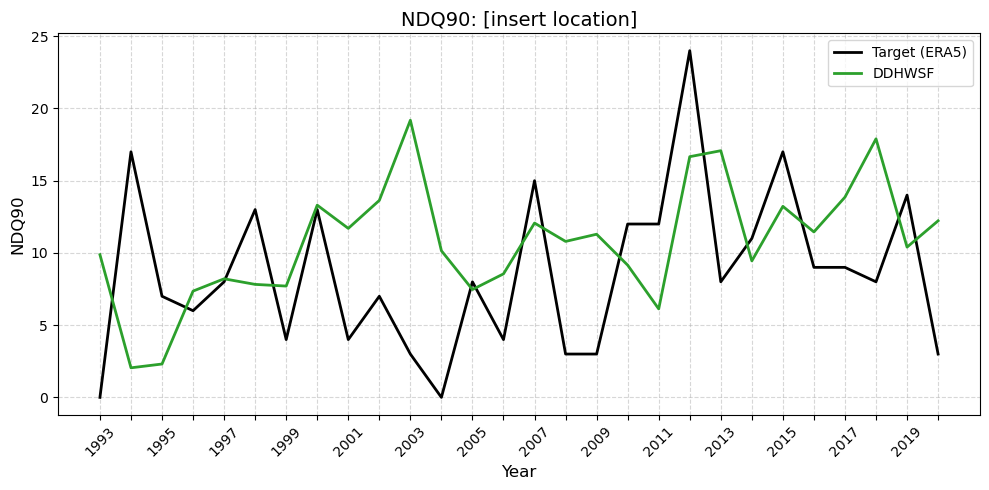

Correlation Skill Score:  0.012094706749156973
Correlation p-value:  0.9512928040522619
RMSE:  7.156929625778053  days


In [5]:
plt.figure(figsize=(10, 5))

# Generate x-axis
years = range(1993,2020+1)

# Plot each line with labels
target_line,=plt.plot(
    years,
    target_ERA5,
    'k-',
    label='Target (ERA5)',
    linewidth=2
)

dd_line,=plt.plot(
    years,
    preds_DDHWSF,
    color='tab:green',
    label='DDHWSF',
    linestyle='-',
    linewidth=2
)

# Add grid, legend, and labels
plt.grid(True, linestyle='--', alpha=0.5)

box_legend = mpatches.Patch(facecolor='lightblue', edgecolor='navy', label='C3S Ensemble')
plt.legend(handles=[target_line, dd_line])

plt.xlabel('Year', fontsize=12)
plt.ylabel('NDQ90', fontsize=12)
plt.title('NDQ90: [insert location]', fontsize=14)
plt.xticks(ticks=years, labels=[str(y) if y % 2 == 1 else "" for y in years], rotation=45)
plt.tight_layout()

plt.show()

corr=sp.pearsonr(target_ERA5,preds_DDHWSF)
print ("Correlation Skill Score: ", corr[0])
print ("Correlation p-value: ", corr[1])
print ("RMSE: ", np.sqrt(mean_squared_error(target_ERA5,preds_DDHWSF))," days")